DATASET DUZENLEME

In [1]:
import pandas as pd

Coronavirüs hastalığı (COVID-19), yeni keşfedilen bir koronavirüsün neden olduğu bulaşıcı bir hastalıktır. COVİD-19 virüsüyle enfekte olan kişilerin çoğu, hafif ila orta şiddette solunum yolu hastalığı yaşayacak ve özel bir tedavi gerektirmeden iyileşecektir. Yaşlı insanların ve kardiyovasküler hastalık, diyabet, kronik solunum yolu hastalığı ve kanser gibi altta yatan tıbbi sorunları olanların ciddi hastalıklara yakalanma olasılığı daha yüksektir.
Pandemi süreci boyunca sağlık hizmeti sağlayıcılarının karşılaştığı temel sorunlardan biri tıbbi kaynak sıkıntısı ve bu kaynakların verimli bir şekilde dağıtılması için uygun bir planın olmamasıydı. Bu zor zamanlarda, bir kişinin testi pozitif çıktığı anda veya bundan önce ne tür bir kaynağa ihtiyaç duyabileceğini tahmin edebilmek, yetkililere, gerekli kaynakları temin edip ayarlayabilecekleri için çok büyük fayda sağlayacaktır.

Bu projenin ana hedefi, bir Kovid-19 hastasının mevcut semptomu, durumu ve tıbbi geçmişi göz önüne alındığında, hastanın yüksek risk altında olup olmadığını tahmin edecek bir makine öğrenimi modeli oluşturmaktır.
Veri seti Meksika hükümeti tarafından sağlandı  . Bu veri seti, ön koşullar da dahil olmak üzere hastayla ilgili çok sayıda anonimleştirilmiş bilgi içerir. Ham veri seti 21 benzersiz özellik ve 1.048.576 benzersiz hastadan oluşmaktadır. Boolean özelliklerinde 1 "evet", 2 "hayır" anlamına gelir. 97 ve 99 gibi değerler eksik veridir .
Veri setini bu zamana kadar 36.8K kişi indirmiştir
Veri seti en son 1 yıl önce güncellenmiştir.

* sex: Kadın için 1, erkek için 2.
* age: hastanın yaşı.
* classification: covid test bulguları. 1-3 arası değerler hastaya farklı derecelerde covid tanısı konduğu anlamına gelir.
4 veya daha yüksek olması, hastanın covid taşıyıcısı olmadığı veya testin sonuçsuz kaldığı anlamına gelir.
* patient type: Hastanın ünitede aldığı bakımın türü. 1'i eve dönüş ve 2'si hastaneye kaldırılma için.
* pneumonia: Hastanın halihazırda hava keselerinde iltihaplanma olup olmadığı.
* pregnancy: Hastanın hamile olup olmadığı.
* diabetes: hastanın diyabet hastası olup olmadığı.
* copd: Hastanın Kronik obstrüktif akciğer hastalığı olup olmadığını belirtir.
* asthma: hastanın astımı olup olmadığı.
* inmsupr: hastanın immün sistemi baskılanmış olup olmadığı.
* hypertension: hastanın hipertansiyonu olup olmadığı.
* cardiovascular: hastanın kalp veya kan damarlarıyla ilgili hastalığı olup olmadığı.
* renal chronic: hastanın kronik böbrek hastalığı olup olmadığı.
* other disease: hastanın başka bir hastalığı olup olmadığı.
* obesity: hastanın obez olup olmadığı.
* tobacco: hastanın tütün kullanıcısı olup olmadığı.
* usmr: Hastanın birinci, ikinci veya üçüncü düzey tıbbi birimlerde tedavi görüp görmediğini belirtir.
* medical : Ulusal Sağlık Sisteminin bakımı sağlayan kurum türü.
* intubed: hastanın ventilatöre bağlı olup olmadığı.
* icu: Hastanın Yoğun Bakım Ünitesine alınıp alınmadığını gösterir.
* date died: Hasta öldüyse ölüm tarihini belirtin, aksi takdirde 9999-99-99'u belirtin.


In [2]:
# reading csv files
data =  pd.read_csv('Covid Data.csv', sep=",")
df = data.copy() #her ihtimale karşı yedekleyelim
df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


In [3]:
df.shape

(1048575, 21)

In [4]:
df.info() 
#kaba bir şekide veri setinin tüm yapısal bilgilerini verir.
#bir pandas dataframe şeklindeymiş
#1048575  adet gözlem değerimiz varmış
# 21  değişkenimiz varmış, değişkenlerin tipleri belirtilmiş
#Ramda 168.0+ MB alan tutmuş

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

In [5]:
df.columns = ["TedaviDurumu","TibbiBirim","Cinsiyet","HastaTuru","SaglikDurumu","Entube","Zaturre","Yas","Hamile","Diyabet",
             "KOAH","Astim","BagisiklikSistemi","HiperTansiyon","DigerHastalik","Kardiyovaskuler","Obezite","KronikBobrek",
             "Sigara","CovidSiniflandirma","ICU"] 
#değişken isimlerini değiştiriyoruz

In [6]:
df.info() 
#kaba bir şekide veri setinin tüm yapısal bilgilerini verir.
#bir pandas dataframe şeklindeymiş
#53940 adet gözlem değerimiz varmış
# 10 değişkenimiz varmış, değişkenlerin tipleri belirtilmiş
#Ramda 3MB alan tutmuş

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column              Non-Null Count    Dtype 
---  ------              --------------    ----- 
 0   TedaviDurumu        1048575 non-null  int64 
 1   TibbiBirim          1048575 non-null  int64 
 2   Cinsiyet            1048575 non-null  int64 
 3   HastaTuru           1048575 non-null  int64 
 4   SaglikDurumu        1048575 non-null  object
 5   Entube              1048575 non-null  int64 
 6   Zaturre             1048575 non-null  int64 
 7   Yas                 1048575 non-null  int64 
 8   Hamile              1048575 non-null  int64 
 9   Diyabet             1048575 non-null  int64 
 10  KOAH                1048575 non-null  int64 
 11  Astim               1048575 non-null  int64 
 12  BagisiklikSistemi   1048575 non-null  int64 
 13  HiperTansiyon       1048575 non-null  int64 
 14  DigerHastalik       1048575 non-null  int64 
 15  Kardiyovaskuler     1048575 non-

In [7]:
df

,TedaviDurumu,TibbiBirim,Cinsiyet,HastaTuru,SaglikDurumu,Entube,Zaturre,Yas,Hamile,Diyabet,...,Astim,BagisiklikSistemi,HiperTansiyon,DigerHastalik,Kardiyovaskuler,Obezite,KronikBobrek,Sigara,CovidSiniflandirma,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,2,1,9999-99-99,97,2,40,97,2,...,2,2,2,2,2,2,2,2,7,97
1048571,1,13,2,2,9999-99-99,2,2,51,97,2,...,2,2,1,2,2,2,2,2,7,2
1048572,2,13,2,1,9999-99-99,97,2,55,97,2,...,2,2,2,2,2,2,2,2,7,97
1048573,2,13,2,1,9999-99-99,97,2,28,97,2,...,2,2,2,2,2,2,2,2,7,97


In [8]:
# 'cinsiyet' sütunundaki değerleri değiştir
df['Cinsiyet'] = df['Cinsiyet'].map({1: 'Kadın', 2: 'Erkek'})

In [9]:
df

,TedaviDurumu,TibbiBirim,Cinsiyet,HastaTuru,SaglikDurumu,Entube,Zaturre,Yas,Hamile,Diyabet,...,Astim,BagisiklikSistemi,HiperTansiyon,DigerHastalik,Kardiyovaskuler,Obezite,KronikBobrek,Sigara,CovidSiniflandirma,ICU
0,2,1,Kadın,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,Erkek,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,Erkek,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,Kadın,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,Erkek,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,Erkek,1,9999-99-99,97,2,40,97,2,...,2,2,2,2,2,2,2,2,7,97
1048571,1,13,Erkek,2,9999-99-99,2,2,51,97,2,...,2,2,1,2,2,2,2,2,7,2
1048572,2,13,Erkek,1,9999-99-99,97,2,55,97,2,...,2,2,2,2,2,2,2,2,7,97
1048573,2,13,Erkek,1,9999-99-99,97,2,28,97,2,...,2,2,2,2,2,2,2,2,7,97


In [10]:
# Cinsiyeti 1 olanları kadın yap, değilse erkek yap
df.loc[df['SaglikDurumu'] != '9999-99-99', 'SaglikDurumu'] = 'Ölü'
df.loc[df['SaglikDurumu'] == '9999-99-99', 'SaglikDurumu'] = 'Sağ'

In [11]:
df

,TedaviDurumu,TibbiBirim,Cinsiyet,HastaTuru,SaglikDurumu,Entube,Zaturre,Yas,Hamile,Diyabet,...,Astim,BagisiklikSistemi,HiperTansiyon,DigerHastalik,Kardiyovaskuler,Obezite,KronikBobrek,Sigara,CovidSiniflandirma,ICU
0,2,1,Kadın,1,Ölü,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,Erkek,1,Ölü,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,Erkek,2,Ölü,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,Kadın,1,Ölü,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,Erkek,1,Ölü,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,Erkek,1,Sağ,97,2,40,97,2,...,2,2,2,2,2,2,2,2,7,97
1048571,1,13,Erkek,2,Sağ,2,2,51,97,2,...,2,2,1,2,2,2,2,2,7,2
1048572,2,13,Erkek,1,Sağ,97,2,55,97,2,...,2,2,2,2,2,2,2,2,7,97
1048573,2,13,Erkek,1,Sağ,97,2,28,97,2,...,2,2,2,2,2,2,2,2,7,97


In [12]:
# Özel bir dönüşüm fonksiyonu tanımla
def safe_convert_to_str(value):
    if (value == 97 or value == 99):
        return pd.NA;
    else:
        return str(value);

# applymap fonksiyonunu kullanarak tüm DataFrame'i dönüştür
df = df.applymap(safe_convert_to_str)

In [13]:
#hiç eksik gözlem(değer) var mı
df.isnull().values.any() # isnull() values üzerinde bir sorgulama yap herhangi birisinde (any) eksik değer varsa true olarak dön.

True

In [14]:
df.isnull().sum() #tüm değişkenlerdeki toplam eksik değer sayısını verir. Hangi değişkende ne kadar eksik var sorusuna cevap alırız.

TedaviDurumu               0
TibbiBirim                 0
Cinsiyet                   0
HastaTuru                  0
SaglikDurumu               0
Entube                855869
Zaturre                16003
Yas                      221
Hamile                523511
Diyabet                    0
KOAH                       0
Astim                      0
BagisiklikSistemi          0
HiperTansiyon              0
DigerHastalik              0
Kardiyovaskuler            0
Obezite                    0
KronikBobrek               0
Sigara                     0
CovidSiniflandirma         0
ICU                   856032
dtype: int64

In [15]:
df

,TedaviDurumu,TibbiBirim,Cinsiyet,HastaTuru,SaglikDurumu,Entube,Zaturre,Yas,Hamile,Diyabet,...,Astim,BagisiklikSistemi,HiperTansiyon,DigerHastalik,Kardiyovaskuler,Obezite,KronikBobrek,Sigara,CovidSiniflandirma,ICU
0,2,1,Kadın,1,Ölü,<NA>,1,65,2,2,...,2,2,1,2,2,2,2,2,3,<NA>
1,2,1,Erkek,1,Ölü,<NA>,1,72,<NA>,2,...,2,2,1,2,2,1,1,2,5,<NA>
2,2,1,Erkek,2,Ölü,1,2,55,<NA>,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,Kadın,1,Ölü,<NA>,2,53,2,2,...,2,2,2,2,2,2,2,2,7,<NA>
4,2,1,Erkek,1,Ölü,<NA>,2,68,<NA>,1,...,2,2,1,2,2,2,2,2,3,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,Erkek,1,Sağ,<NA>,2,40,<NA>,2,...,2,2,2,2,2,2,2,2,7,<NA>
1048571,1,13,Erkek,2,Sağ,2,2,51,<NA>,2,...,2,2,1,2,2,2,2,2,7,2
1048572,2,13,Erkek,1,Sağ,<NA>,2,55,<NA>,2,...,2,2,2,2,2,2,2,2,7,<NA>
1048573,2,13,Erkek,1,Sağ,<NA>,2,28,<NA>,2,...,2,2,2,2,2,2,2,2,7,<NA>


In [17]:
# 'Yas' sütununu string'ten int'e çevir
df['Yas'] = pd.to_numeric(df['Yas'], errors='coerce').astype('Int64')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column              Non-Null Count    Dtype 
---  ------              --------------    ----- 
 0   TedaviDurumu        1048575 non-null  object
 1   TibbiBirim          1048575 non-null  object
 2   Cinsiyet            1048575 non-null  object
 3   HastaTuru           1048575 non-null  object
 4   SaglikDurumu        1048575 non-null  object
 5   Entube              192706 non-null   object
 6   Zaturre             1032572 non-null  object
 7   Yas                 1048354 non-null  Int64 
 8   Hamile              525064 non-null   object
 9   Diyabet             1048575 non-null  object
 10  KOAH                1048575 non-null  object
 11  Astim               1048575 non-null  object
 12  BagisiklikSistemi   1048575 non-null  object
 13  HiperTansiyon       1048575 non-null  object
 14  DigerHastalik       1048575 non-null  object
 15  Kardiyovaskuler     1048575 non-

In [19]:
df.isnull().sum() #tüm değişkenlerdeki toplam eksik değer sayısını verir. Hangi değişkende ne kadar eksik var sorusuna cevap alırız.

TedaviDurumu               0
TibbiBirim                 0
Cinsiyet                   0
HastaTuru                  0
SaglikDurumu               0
Entube                855869
Zaturre                16003
Yas                      221
Hamile                523511
Diyabet                    0
KOAH                       0
Astim                      0
BagisiklikSistemi          0
HiperTansiyon              0
DigerHastalik              0
Kardiyovaskuler            0
Obezite                    0
KronikBobrek               0
Sigara                     0
CovidSiniflandirma         0
ICU                   856032
dtype: int64

In [20]:
# DataFrame'i CSV dosyasına kaydet
df.to_csv('duzenlenmis_Covid19.csv', index=False)

In [21]:
import pandas as pd

Coronavirüs hastalığı (COVID-19), yeni keşfedilen bir koronavirüsün neden olduğu bulaşıcı bir hastalıktır. COVİD-19 virüsüyle enfekte olan kişilerin çoğu, hafif ila orta şiddette solunum yolu hastalığı yaşayacak ve özel bir tedavi gerektirmeden iyileşecektir. Yaşlı insanların ve kardiyovasküler hastalık, diyabet, kronik solunum yolu hastalığı ve kanser gibi altta yatan tıbbi sorunları olanların ciddi hastalıklara yakalanma olasılığı daha yüksektir.
Pandemi süreci boyunca sağlık hizmeti sağlayıcılarının karşılaştığı temel sorunlardan biri tıbbi kaynak sıkıntısı ve bu kaynakların verimli bir şekilde dağıtılması için uygun bir planın olmamasıydı. Bu zor zamanlarda, bir kişinin testi pozitif çıktığı anda veya bundan önce ne tür bir kaynağa ihtiyaç duyabileceğini tahmin edebilmek, yetkililere, gerekli kaynakları temin edip ayarlayabilecekleri için çok büyük fayda sağlayacaktır.

Bu projenin ana hedefi, bir Kovid-19 hastasının mevcut semptomu, durumu ve tıbbi geçmişi göz önüne alındığında, hastanın yüksek risk altında olup olmadığını tahmin edecek bir makine öğrenimi modeli oluşturmaktır.
Veri seti Meksika hükümeti tarafından sağlandı  . Bu veri seti, ön koşullar da dahil olmak üzere hastayla ilgili çok sayıda anonimleştirilmiş bilgi içerir. Ham veri seti 21 benzersiz özellik ve 1.048.576 benzersiz hastadan oluşmaktadır. Boolean özelliklerinde 1 "evet", 2 "hayır" anlamına gelir. 
Veri setini bu zamana kadar 36.8K kişi indirmiştir
Veri seti en son 1 yıl önce güncellenmiştir.

* Cinsiyet: Kadın ve erkek değerlerin oluşmaktadır.
* Yas: hastanın yaşı.
* CovidSiniflandirma: covid test bulguları. 1-3 arası değerler hastaya farklı derecelerde covid tanısı konduğu anlamına gelir
. 4 veya daha yüksek olması, hastanın covid taşıyıcısı olmadığı veya testin sonuçsuz kaldığı anlamına gelir.
* HastaTuru: Hastanın ünitede aldığı bakımın türü. 1'i eve dönüş ve 2'si hastaneye kaldırılma için.
* KronikBobrek: Hastanın halihazırda hava keselerinde iltihaplanma olup olmadığı.
* Hamile: Hastanın hamile olup olmadığı.
* Diyabet: hastanın diyabet hastası olup olmadığı.
* KOAH: Hastanın Kronik obstrüktif akciğer hastalığı olup olmadığını belirtir.
* Astim: hastanın astımı olup olmadığı.
* BagisiklikSistemi: hastanın bağışıklılık sistemi baskılanmış olup olmadığı.
* HiperTansiyon: hastanın hipertansiyonu olup olmadığı.
* Kardiyovaskuler: hastanın kalp veya kan damarlarıyla ilgili hastalığı olup olmadığı.
* Zaturre: hastanın kronik böbrek hastalığı olup olmadığı.
* DigerHastalik: hastanın başka bir hastalığı olup olmadığı.
* Obezite: hastanın obez olup olmadığı.
* Sigara: hastanın tütün kullanıcısı olup olmadığı.
* TedaviTuru: Hastanın birinci, ikinci veya üçüncü düzey tıbbi birimlerde tedavi görüp görmediğini belirtir.
* TibbiBirim: Ulusal Sağlık Sisteminin bakımı sağlayan kurum türü.
* Entube: hastanın ventilatöre bağlı olup olmadığı.
* ICU: Hastanın Yoğun Bakım Ünitesine alınıp alınmadığını gösterir.
* SaglikDurumu: Hasta öldüyse ölüm tarihini belirtin, aksi takdirde 9999-99-99'u belirtin.

In [321]:
# reading csv files
data =  pd.read_csv('duzenlenmis_Covid19.csv', sep=",")
df = data.copy() #her ihtimale karşı yedekleyelim
df.head()

,TedaviDurumu,TibbiBirim,Cinsiyet,HastaTuru,SaglikDurumu,Entube,Zaturre,Yas,Hamile,Diyabet,...,Astim,BagisiklikSistemi,HiperTansiyon,DigerHastalik,Kardiyovaskuler,Obezite,KronikBobrek,Sigara,CovidSiniflandirma,ICU
0,2,1,Kadın,1,Ölü,NaN,1.0,65.0,2.0,2,...,2,2,1,2,2,2,2,2,3,NaN
1,2,1,Erkek,1,Ölü,NaN,1.0,72.0,NaN,2,...,2,2,1,2,2,1,1,2,5,NaN
2,2,1,Erkek,2,Ölü,1.0,2.0,55.0,NaN,1,...,2,2,2,2,2,2,2,2,3,2.0
3,2,1,Kadın,1,Ölü,NaN,2.0,53.0,2.0,2,...,2,2,2,2,2,2,2,2,7,NaN
4,2,1,Erkek,1,Ölü,NaN,2.0,68.0,NaN,1,...,2,2,1,2,2,2,2,2,3,NaN


In [322]:
# 'Entube' sütununu float'tan int'e çevir
df['Yas'] = pd.to_numeric(df['Yas'], errors='coerce').astype('Int64')
df['Hamile'] = pd.to_numeric(df['Hamile'], errors='coerce').astype('Int64')
df['Zaturre'] = pd.to_numeric(df['Zaturre'], errors='coerce').astype('Int64')
df['Entube'] = pd.to_numeric(df['Entube'], errors='coerce').astype('Int64')
df['ICU'] = pd.to_numeric(df['ICU'], errors='coerce').astype('Int64')

#Pandas kütüphanesi null değişken algıladığında float olarak algılar.
#Float Değişkeni NaN değerini en iyi temsil eden veri tipidir. Bu yüzden float algılar.

In [323]:
# Tüm 'object' veri tipindeki sütunları 'category' yap
for column in df.columns:
    df[column] = df[column].astype('category')

In [324]:
df['Yas'] = pd.to_numeric(df['Yas'], errors='coerce').astype('Int64')

In [325]:
df.shape

(1048575, 21)

In [326]:
df.info() 
#kaba bir şekide veri setinin tüm yapısal bilgilerini verir.
#bir pandas dataframe şeklindeymiş
#1048575 adet gözlem değerimiz varmış
# 21 değişkenimiz varmış, değişkenlerin tipleri belirtilmiş
#Ramda 168.0+ MB alan tutmuş

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column              Non-Null Count    Dtype   
---  ------              --------------    -----   
 0   TedaviDurumu        1048575 non-null  category
 1   TibbiBirim          1048575 non-null  category
 2   Cinsiyet            1048575 non-null  category
 3   HastaTuru           1048575 non-null  category
 4   SaglikDurumu        1048575 non-null  category
 5   Entube              192706 non-null   category
 6   Zaturre             1032572 non-null  category
 7   Yas                 1048354 non-null  Int64   
 8   Hamile              525064 non-null   category
 9   Diyabet             1048575 non-null  category
 10  KOAH                1048575 non-null  category
 11  Astim               1048575 non-null  category
 12  BagisiklikSistemi   1048575 non-null  category
 13  HiperTansiyon       1048575 non-null  category
 14  DigerHastalik       1048575 non-null  category
 15

In [327]:
df.describe() #sürekli (sayısal) değişkenlerin betimsel özelliklerine bakalım

,Yas
count,1048354.0
mean,41.782301
std,16.889613
min,0.0
25%,30.0
50%,40.0
75%,53.0
max,121.0


In [328]:
#hiç eksik gözlem(değer) var mı
df.isnull().values.any() # isnull() values üzerinde bir sorgulama yap herhangi birisinde (any) eksik değer varsa true olarak dön.

True

In [329]:
df.isnull().values.sum() # df deki toplam eksik veri sayısı

2251636

In [330]:
df.isnull().sum() #tüm değişkenlerdeki toplam eksik değer sayısını verir. Hangi değişkende ne kadar eksik var sorusuna cevap alırız.

TedaviDurumu               0
TibbiBirim                 0
Cinsiyet                   0
HastaTuru                  0
SaglikDurumu               0
Entube                855869
Zaturre                16003
Yas                      221
Hamile                523511
Diyabet                    0
KOAH                       0
Astim                      0
BagisiklikSistemi          0
HiperTansiyon              0
DigerHastalik              0
Kardiyovaskuler            0
Obezite                    0
KronikBobrek               0
Sigara                     0
CovidSiniflandirma         0
ICU                   856032
dtype: int64

In [338]:
kat_df = df.select_dtypes(include = ["categor"]) #select_dtypes () dataframe içerisinden istediğimiz türe göre değişken seçmek için kullanılır.

In [333]:
kat_df.head(5)

,TedaviDurumu,TibbiBirim,Cinsiyet,HastaTuru,SaglikDurumu,Entube,Zaturre,Hamile,Diyabet,KOAH,Astim,BagisiklikSistemi,HiperTansiyon,DigerHastalik,Kardiyovaskuler,Obezite,KronikBobrek,Sigara,CovidSiniflandirma,ICU
0,2,1,Kadın,1,Ölü,NaN,1,2,2,2,2,2,1,2,2,2,2,2,3,NaN
1,2,1,Erkek,1,Ölü,NaN,1,NaN,2,2,2,2,1,2,2,1,1,2,5,NaN
2,2,1,Erkek,2,Ölü,1,2,NaN,1,2,2,2,2,2,2,2,2,2,3,2
3,2,1,Kadın,1,Ölü,NaN,2,2,2,2,2,2,2,2,2,2,2,2,7,NaN
4,2,1,Erkek,1,Ölü,NaN,2,NaN,1,2,2,2,1,2,2,2,2,2,3,NaN


In [334]:
df["TibbiBirim"].value_counts().index

CategoricalIndex([12, 4, 6, 9, 3, 8, 10, 5, 11, 13, 7, 2, 1], categories=[1, 2, 3, 4, ..., 10, 11, 12, 13], ordered=False, dtype='category', name='TibbiBirim')

In [335]:
df["TibbiBirim"].value_counts() #cut değişkenlerine ait sınıflar ve bu sınıfların frekanslarına erişmiş olduk
                         #df.TibbiBirim.value_counts() şekildede yapabiliriz

TibbiBirim
12    602995
4     314405
6      40584
9      38116
3      19175
8      10399
10      7873
5       7244
11      5577
13       996
7        891
2        169
1        151
Name: count, dtype: int64

  **ORDİNAL TANIMLAMA**

* **TıbbiBirim** 
* 1-13 arası değerleri alır
* Hastane olanaklarının seviyesini gösterir.
* 1 seviyesi daha iyi 13'e doğru da hastane olanağında azalma görülmektedir

In [ ]:
df["TibbiBirim"].value_counts().index

In [ ]:
df["TibbiBirim"].value_counts() #cut değişkenlerine ait sınıflar ve bu sınıfların frekanslarına erişmiş olduk
                         #df.TibbiBirim.value_counts() şekildede yapabiliriz

In [343]:
from pandas.api.types import CategoricalDtype #pandas.api.types'dan CategoricalDtype metodunu ekle.
# Belirtilen kategorik değerlerin DataFrame'deki mevcut değerlerle uyumlu olup olmadığını kontrol et
# DataFrame'deki mevcut benzersiz değerleri kontrol et
#TibbiBirim_kategoriler = ["1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12", "13"]
#TibbiBirim_kategoriler = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
TibbiBirim_kategoriler = [13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
df['TibbiBirim'] = df['TibbiBirim'].astype(CategoricalDtype(categories=TibbiBirim_kategoriler, ordered=True))

In [344]:
df["TibbiBirim"].value_counts() #cut değişkenlerine ait sınıflar ve bu sınıfların frekanslarına erişmiş olduk
                         #df.TibbiBirim.value_counts() şekildede yapabiliriz

TibbiBirim
12    602995
4     314405
6      40584
9      38116
3      19175
8      10399
10      7873
5       7244
11      5577
13       996
7        891
2        169
1        151
Name: count, dtype: int64

In [351]:
df["TibbiBirim"].value_counts().index

CategoricalIndex([12, 4, 6, 9, 3, 8, 10, 5, 11, 13, 7, 2, 1], categories=[1, 2, 3, 4, ..., 10, 11, 12, 13], ordered=True, dtype='category', name='TibbiBirim')

In [345]:
df["TibbiBirim"].head(1) 

0    1
Name: TibbiBirim, dtype: category
Categories (13, int64): [1 < 2 < 3 < 4 ... 10 < 11 < 12 < 13]

* **HastaTuru**
* Hastanın 1 ise eve dönüş yaptığını 2 ise hastane kaldırıldığını belirtir.

In [361]:
df["HastaTuru"].value_counts().index

CategoricalIndex([1, 2], categories=[1, 2], ordered=False, dtype='category', name='HastaTuru')

In [373]:
df["HastaTuru"].value_counts() #cut değişkenlerine ait sınıflar ve bu sınıfların frekanslarına erişmiş olduk
                         #df.TibbiBirim.value_counts() şekildede yapabiliriz

HastaTuru
1    848544
2    200031
Name: count, dtype: int64

In [363]:
from pandas.api.types import CategoricalDtype #pandas.api.types'dan CategoricalDtype metodunu ekle.
# Belirtilen kategorik değerlerin DataFrame'deki mevcut değerlerle uyumlu olup olmadığını kontrol et
# DataFrame'deki mevcut benzersiz değerleri kontrol et
HastaTuru_kategoriler = [1,2]
df['HastaTuru'] = df['HastaTuru'].astype(CategoricalDtype(categories=HastaTuru_kategoriler, ordered=True))

In [364]:
df["HastaTuru"].value_counts() #cut değişkenlerine ait sınıflar ve bu sınıfların frekanslarına erişmiş olduk
                         #df.TibbiBirim.value_counts() şekildede yapabiliriz

HastaTuru
1    848544
2    200031
Name: count, dtype: int64

In [365]:
df["HastaTuru"].value_counts().index

CategoricalIndex([1, 2], categories=[1, 2], ordered=True, dtype='category', name='HastaTuru')

In [366]:
df["HastaTuru"].head(1) 

0    1
Name: HastaTuru, dtype: category
Categories (2, int64): [1 < 2]

* **CovidSiniflandirma**
* 1-3 arasında ise Covid olduğunu ve derecesini gösterir.
* 1 daha kötü seviye,3 daha iyi seviyedir,

* 4-7 arasında olan seviyeler Coivd olmadığını gösterir.
* 7  ye doğru olan seviyeler Covid olmadığına daka kesin sonuçlardır.

In [367]:
df["CovidSiniflandirma"].value_counts().index

CategoricalIndex([7, 3, 6, 5, 1, 4, 2], categories=[1, 2, 3, 4, 5, 6, 7], ordered=False, dtype='category', name='CovidSiniflandirma')

In [368]:
df["CovidSiniflandirma"].value_counts() #cut değişkenlerine ait sınıflar ve bu sınıfların frekanslarına erişmiş olduk
                         #df.TibbiBirim.value_counts() şekildede yapabiliriz

CovidSiniflandirma
7    499250
3    381527
6    128133
5     26091
1      8601
4      3122
2      1851
Name: count, dtype: int64

In [369]:
from pandas.api.types import CategoricalDtype #pandas.api.types'dan CategoricalDtype metodunu ekle.
# Belirtilen kategorik değerlerin DataFrame'deki mevcut değerlerle uyumlu olup olmadığını kontrol et
# DataFrame'deki mevcut benzersiz değerleri kontrol et
CovidSiniflandirma_kategoriler = [7,6,5,4,3,2,1]
df['CovidSiniflandirma'] = df['CovidSiniflandirma'].astype(CategoricalDtype(categories=CovidSiniflandirma_kategoriler, ordered=True))

In [370]:
df["CovidSiniflandirma"].value_counts() #cut değişkenlerine ait sınıflar ve bu sınıfların frekanslarına erişmiş olduk
                         #df.TibbiBirim.value_counts() şekildede yapabiliriz

CovidSiniflandirma
7    499250
3    381527
6    128133
5     26091
1      8601
4      3122
2      1851
Name: count, dtype: int64

In [371]:
df["CovidSiniflandirma"].value_counts().index

CategoricalIndex([7, 3, 6, 5, 1, 4, 2], categories=[7, 6, 5, 4, 3, 2, 1], ordered=True, dtype='category', name='CovidSiniflandirma')

In [372]:
df["CovidSiniflandirma"].head(1) 

0    3
Name: CovidSiniflandirma, dtype: category
Categories (7, int64): [7 < 6 < 5 < 4 < 3 < 2 < 1]

# Dağılım Grafikleri
Bu grafikler elimizdeki sürekli ve kategorik değişimlerin dağılımlarını görsel teknikler ile bize sunma imkanı sağlar. Bu grafikler aracılığıyla önemli olan yapı tanıma  işlemini gerçekleştirmiş oluruz.

## Barplot (Kategorik Değişken)
(Sütun grafik tekniği)
Elimizdeki kategorik değişkenleri görselleştirmek için kullanırız.

In [348]:
df["TibbiBirim"].value_counts()

TibbiBirim
12    602995
4     314405
6      40584
9      38116
3      19175
8      10399
10      7873
5       7244
11      5577
13       996
7        891
2        169
1        151
Name: count, dtype: int64

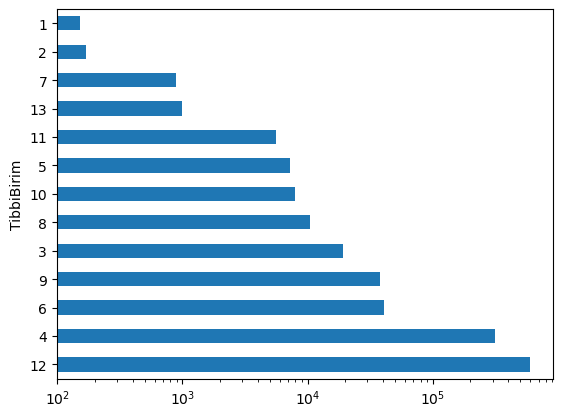

In [349]:
df["TibbiBirim"].value_counts().plot.barh(logx=True);